In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
games = pd.read_csv('./data/results_pl.csv')
games.head()

,date,tournament,opponent,scored,conceded,is_home,neutral,city,country
0,1921-12-18,Friendly,Hungary,0,1,False,False,Budapest,Hungary
1,1922-05-14,Friendly,Hungary,0,3,True,False,Cracow,Poland
2,1922-05-28,Friendly,Sweden,2,1,False,False,Stockholm,Sweden
3,1922-09-03,Friendly,Romania,1,1,False,False,Cernăuţi,Romania
4,1922-10-01,Friendly,Yugoslavia,3,1,False,False,Zagreb,Yugoslavia


In [3]:
group_opp = games.groupby('opponent')
overall = group_opp.agg({'date':'count', 'scored':'sum', 'conceded':'sum'})
overall.head()

,date,scored,conceded
opponent,,,
Albania,11,14,7
Algeria,1,5,1
Andorra,1,4,0
Argentina,11,12,18
Armenia,7,15,4


In [4]:
over_5 = overall[overall['date']>5]
over_5.rename(columns={'date':'games'}, inplace=True)
over_5['scored_ratio'] = round(over_5['scored'] / over_5['games'],2)
over_5['conceded_ratio'] = round(over_5['conceded'] / over_5['games'],2)

C:\Users\marci\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\marci\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marci\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

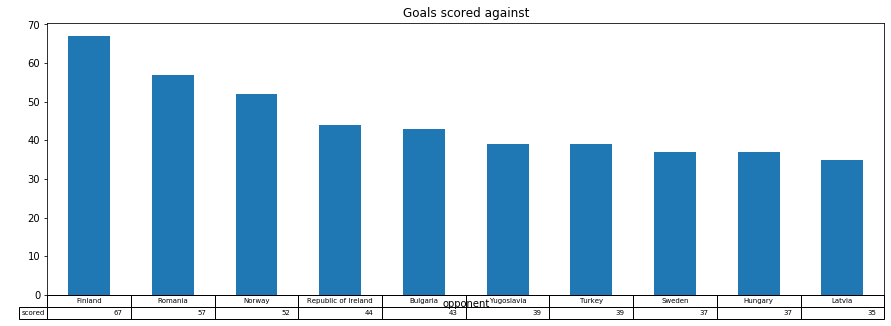

In [5]:
scored = over_5.sort_values('scored', ascending=False)
scored[:10]['scored'].plot(figsize=(15,5), kind='bar', rot=45, table=True, xticks=[],
                           title='Goals scored against')

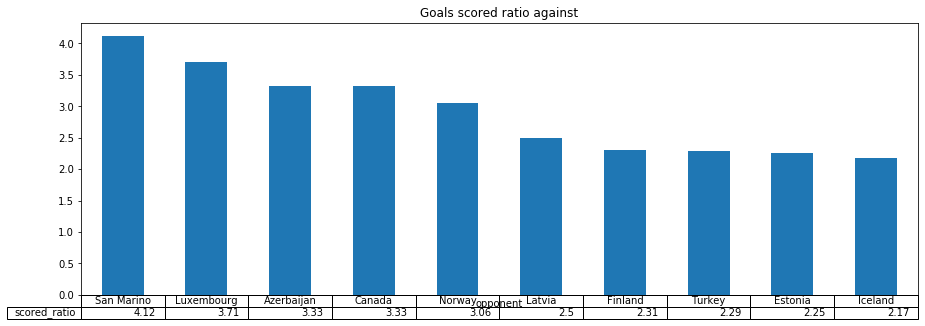

In [6]:
scored_ratio = over_5.sort_values('scored_ratio', ascending=False)
scored_ratio[:10]['scored_ratio'].plot(figsize=(15,5), kind='bar', rot=45, table=True, xticks=[],
                                       title='Goals scored ratio against')

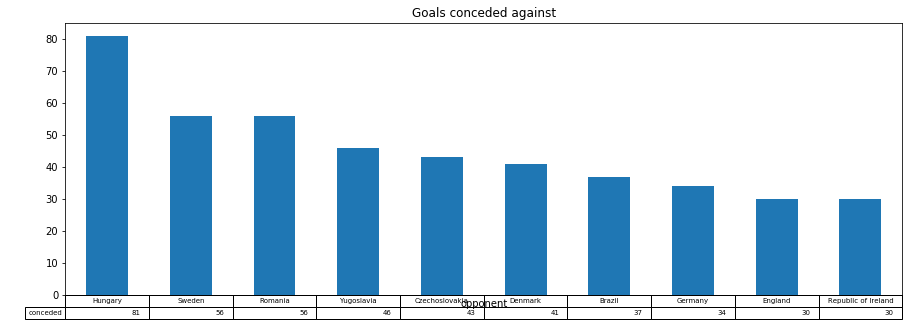

In [7]:
conceded = over_5.sort_values('conceded', ascending=False)
conceded[:10]['conceded'].plot(figsize=(15,5), kind='bar', rot=45, table=True, xticks=[],
                                title='Goals conceded against')

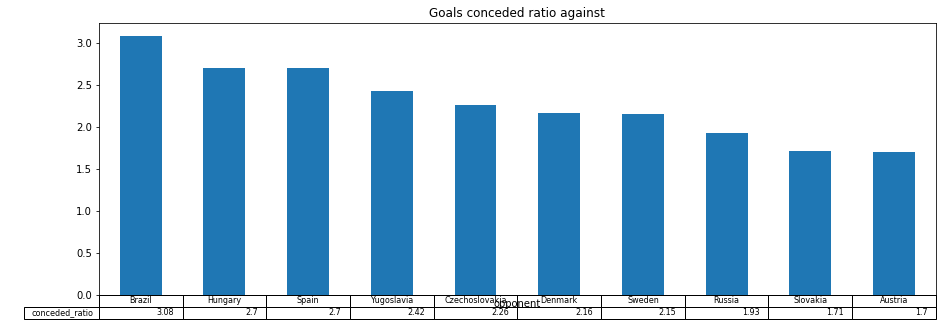

In [8]:
conceded_ratio = over_5.sort_values('conceded_ratio', ascending=False)
conceded_ratio[:10]['conceded_ratio'].plot(figsize=(15,5), kind='bar', rot=45, table=True, xticks=[],
                                           title='Goals conceded ratio against')